# When should I use a 'groupby' in pandas?

In [1]:
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [2]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [5]:
drinks.tail()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,333,100,3,7.7,South America
189,111,2,1,2.0,Asia
190,6,0,0,0.1,Asia
191,32,19,4,2.5,Africa
192,64,18,4,4.7,Africa


In [4]:
drinks.drop(columns=['country'],inplace=True)

In [172]:
drinks[drinks.continent=='Asia'].beer_servings.mean()

37.04545454545455

In [173]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [174]:
train=pd.read_csv('train_v2.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [175]:
train.head()

,Store ID,DayOfWeek,Date,Sales,Customers ID,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,1/30/2015,5577,616,1,1,0,0
1,2,5,1/30/2015,5919,624,1,1,0,0
2,3,5,1/30/2015,6911,678,1,1,0,0
3,4,5,1/30/2015,13307,1632,1,1,0,0
4,5,5,1/30/2015,5640,617,1,1,0,0


In [176]:
train.groupby('Customers ID').Sales.mean()

Customers ID
0           0.000000
82        632.000000
99        667.000000
102      1040.000000
109       888.000000
114      1355.000000
115       887.000000
118       996.000000
127      1234.000000
130      1409.000000
131      1113.000000
132      1322.000000
133      1072.000000
134       856.000000
135      1266.000000
137      1200.000000
138      1028.000000
139      1291.000000
142      1161.666667
143      1341.000000
144      1337.000000
145      1237.333333
146      1593.000000
147      1506.000000
148      1191.000000
150      1442.000000
151      1451.666667
152      1285.500000
153      1520.000000
154      1412.000000
            ...     
4041    18963.000000
4042    30393.000000
4054    29834.000000
4081    27716.000000
4086    31141.000000
4097    19248.000000
4101    30066.000000
4102    27544.000000
4132    19088.000000
4138    15313.000000
4175    15028.000000
4180    31930.000000
4234    15975.000000
4242    23316.000000
4264    33984.000000
4271    30493.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B685882048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000B684D7C9E8>]], dtype=object)

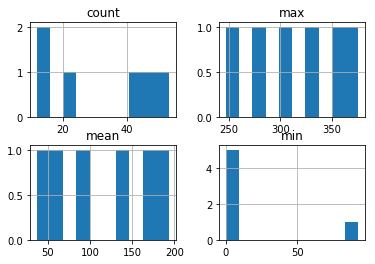

In [177]:
%matplotlib inline
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean']).hist()


In [178]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


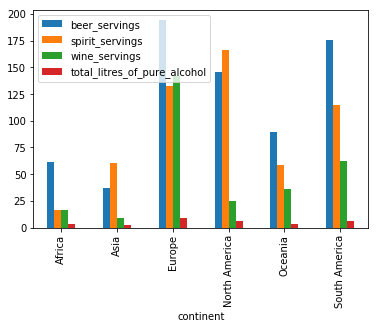

In [179]:
drinks.groupby('continent').mean().plot(kind='bar')

# How do I explore a pandas Series?

In [180]:
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [181]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [182]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [183]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [184]:
movies['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [185]:
movies.genre.nunique()

16

In [186]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [187]:
movies.duration.mean()

120.97957099080695

In [188]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

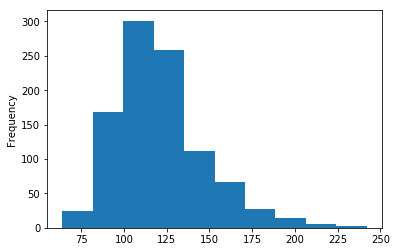

In [189]:
movies.duration.plot(kind='hist')

# How do I handle missing values in pandas?

In [190]:
movies.isnull().tail()

,star_rating,title,content_rating,genre,duration,actors_list
974,False,False,False,False,False,False
975,False,False,False,False,False,False
976,False,False,False,False,False,False
977,False,False,False,False,False,False
978,False,False,False,False,False,False


In [191]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [192]:
movies[movies.content_rating.isnull()]
# kon gula null ase movies df er ta dekhte hole ai technique

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [193]:
movies.shape

(979, 6)

In [194]:
movies.dropna(subset=['content_rating']).shape

(976, 6)

In [195]:
movies.shape

(979, 6)

In [196]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [197]:
movies.dropna().shape

(976, 6)

In [198]:
ufo=pd.read_csv('http://bit.ly/uforeports')

In [199]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [200]:
ufo.shape

(18241, 5)

In [201]:
ufo.dropna().shape

(2486, 5)

In [202]:
ufo.shape

(18241, 5)

In [203]:
ufo.shape

(18241, 5)

In [204]:
ufo.head(5)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [205]:
ufo.dropna(subset=['City','Colors Reported'],how='all').shape

(18221, 5)

In [206]:
ufo['Colors Reported'].fillna(value='VARIOUS',inplace=True)

In [207]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,VARIOUS,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,VARIOUS,OTHER,NJ,6/30/1930 20:00
2,Holyoke,VARIOUS,OVAL,CO,2/15/1931 14:00
3,Abilene,VARIOUS,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,VARIOUS,LIGHT,NY,4/18/1933 19:00


# What do I need to know about the pandas index?

In [208]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [209]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [210]:
drinks[drinks.continent=='Asia']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
12,Bahrain,42,63,7,2.0,Asia
13,Bangladesh,0,0,0,0.0,Asia
19,Bhutan,23,0,0,0.4,Asia
24,Brunei,31,2,1,0.6,Asia
30,Cambodia,57,65,1,2.2,Asia
36,China,79,192,8,5.0,Asia
46,North Korea,0,0,0,0.0,Asia
77,India,9,114,0,2.2,Asia
78,Indonesia,5,1,0,0.1,Asia


In [211]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [212]:
drinks.set_axis('Country', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_axis now takes "labels" as first argument, and "axis" as named parameter. The old form, with "axis" as first parameter and "labels" as second, is still supported but will be deprecated in a future version of pandas.
  """Entry point for launching an IPython kernel.


ValueError: No axis named Country for object type <class 'pandas.core.frame.DataFrame'>

In [ ]:
drinks.head(4)

In [ ]:
drinks.set_index('country',inplace=True)

In [ ]:
drinks.head()

In [ ]:
drinks.index.name=None

In [ ]:
drinks.head()

In [ ]:
drinks.index.name='country'

In [ ]:
drinks.reset_index(inplace=True)

In [ ]:
drinks.head()

In [ ]:
drinks.describe()

In [ ]:
drinks.describe().index

In [ ]:
drinks.describe().columns

In [ ]:
drinks.columns

In [ ]:
dtypes(drinks)

In [ ]:
types(drinks)

In [ ]:
drinks.dtypes

In [ ]:
drinks.describe().loc['25%':,'beer_servings':]

In [ ]:
drinks.describe()

In [ ]:
ufo.head(3)

In [ ]:
ufo.loc[0:2,:]

In [ ]:
ufo.iloc[0:3,0:5]

In [ ]:
ufo.ix[1,3]

In [ ]:
ufo.ix[1,4]

In [ ]:
ufo.ix[:,4]

In [ ]:
ufo.count()

In [ ]:
ufo.loc[ufo.City=='Oakland',:]

In [ ]:
ufo.ix[0:2,0:1]

In [ ]:
ufo.ix[[0,1,2,3],'Time']

# How do I work with dates and times in pandas? 

In [321]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [322]:
type(ufo)

pandas.core.frame.DataFrame

In [323]:
ufo.Time.head(4)

0     6/1/1930 22:00
1    6/30/1930 20:00
2    2/15/1931 14:00
3     6/1/1931 13:00
Name: Time, dtype: object

In [324]:
ufo.Time.str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [ ]:
ufo.Time=pd.to_datetime(ufo.Time)

In [ ]:
ufo.head(5)

In [ ]:
ufo.dtypes

In [ ]:
ufo.Time.dt.hour

In [ ]:
ufo.Time.dt.weekday_name

In [ ]:
ufo.Time.dt.dayofyear

In [ ]:
tp=pd.to_datetime('1/1/1999')

In [ ]:
ufo.loc[ufo.Time>=tp,:]

In [ ]:
ufo.Time.max()-ufo.Time.min()

In [ ]:
ufo.Time.max()

In [ ]:
ufo.Time.min()

In [ ]:
(ufo.Time.max()-ufo.Time.min()).days

In [ ]:
#the number of ufo Reports by year
ufo['Year'] = ufo.Time.dt.year

In [ ]:
ufo.head()

In [ ]:
ufo.Year.value_counts()

In [ ]:
ufo.Year.value_counts().sort_index().plot()

# How do I find and remove duplicate rows

In [ ]:
ufo.loc[ufo.duplicated(),:].count()

In [ ]:
ufo.duplicated().sum()

In [213]:
train.head()

,Store ID,DayOfWeek,Date,Sales,Customers ID,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,1/30/2015,5577,616,1,1,0,0
1,2,5,1/30/2015,5919,624,1,1,0,0
2,3,5,1/30/2015,6911,678,1,1,0,0
3,4,5,1/30/2015,13307,1632,1,1,0,0
4,5,5,1/30/2015,5640,617,1,1,0,0


In [214]:
train=pd.read_csv('http://bit.ly/kaggletrain')

In [216]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [217]:
train['Sex_male']=train.Sex.map({'male':1,'female':0})

In [218]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [219]:
pd.get_dummies(train.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [220]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [221]:
train.drop(columns=['Sex_male'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [222]:
sex_dummies=pd.get_dummies(train.Sex,prefix='Sex',drop_first=True)

In [224]:
pd.concat([train,sex_dummies],axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [226]:
train.loc[:,'PassengerId':'Sex_male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [227]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [228]:
embarked_dummies=pd.get_dummies(train.Embarked,prefix='Embarked',drop_first=True)

In [229]:
pd.concat([train,embarked_dummies],axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [235]:
train=pd.read_csv('http://bit.ly/kaggletrain')

In [236]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [238]:
dummy=pd.get_dummies(train,columns=['Sex','Embarked'],drop_first=True)
# erok korle ar concate korar dorkar hoi na

In [237]:
dummy.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [234]:
pd.concat([train,dummy],axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


# How do I find and remove duplicate rows in pandas?

In [239]:
# read a dataset of movie reviewrs ( modified the default parameter values for read_table)
user_cols=['user_id','age','gender','occupation','zip_code']

In [241]:
users=pd.read_table('http://bit.ly/movieusers',sep='|',header=None,names=user_cols,index_col='user_id')

In [242]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [245]:
users.zip_code.duplicated().sum()

148

In [246]:
# jodi koto gula row duplicated ase ta dekhte chai
users.duplicated().sum()

7

In [248]:
users.loc[users.duplicated(keep=False),:]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [249]:
# fale dite chaile
print(users.shape)
users.drop_duplicates(keep=False).shape

(943, 4)


(929, 4)

In [250]:
# jodi nidishtro column er jonno dekhte chai je duplicate koita ase
users.duplicated(subset=['age','zip_code'],keep='last')

user_id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28      True
29     False
30     False
       ...  
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924    False
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
943    False
Length: 943, dtype: bool

In [252]:
users.loc[users.duplicated(subset=['age','zip_code'],keep=False),:]

,age,gender,occupation,zip_code
user_id,,,,
28,32,M,writer,55369
31,24,M,artist,10003
67,17,M,student,60402
74,39,M,scientist,T8H1N
84,32,M,executive,55369
85,51,M,educator,20003
178,26,M,other,49512
198,21,F,student,55414
274,20,F,student,55414


In [253]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [265]:
movies.isnull().sum()
import numpy as np

In [266]:
movies[movies.content_rating=='NOT RATED'].content_rating=np.nan

C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [278]:
top_movies=movies.loc[movies.star_rating>=9,:].copy()

In [279]:
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [280]:
top_movies.loc[0,'duration']=150

In [281]:
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


# How do I change display options in pandas?

In [282]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [283]:
pd.get_option('display.max_rows')

60

In [284]:
pd.set_option('display.max_rows',None)

In [287]:
pd.set_option('display.max_colwidth',1000)

In [289]:
pd.set_option('display.precision',2)

In [295]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,x,y
0,Afghanistan,0,0,0,0.0,Asia,0,0.0
1,Albania,89,132,54,4.9,Europe,89000,"4,900.0"
2,Algeria,25,0,14,0.7,Africa,25000,700.0
3,Andorra,245,138,312,12.4,Europe,245000,"12,400.0"
4,Angola,217,57,45,5.9,Africa,217000,"5,900.0"


In [296]:
drinks['x']=drinks.beer_servings*1000
drinks['y']=drinks.total_litres_of_pure_alcohol*1000

In [297]:
pd.set_option('display.float_format','{:,}'.format)

In [299]:
pd.describe_option('row')

display.latex.multirow : bool
    This specifies if the to_latex method of a Dataframe uses multirows
    to pretty-print MultiIndex rows.
    Valid values: False,True
    [default: False] [currently: False]

display.max_info_rows : int or None
    df.info() will usually show null-counts for each column.
    For large frames this can be quite slow. max_info_rows and max_info_cols
    limit this null check only to frames with smaller dimensions than
    specified.
    [default: 1690785] [currently: 1690785]

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, 

In [301]:
pd.reset_option('all')

html.border has been deprecated, use display.html.border instead
(currently both are identical)


use_inf_as_null had been deprecated and will be removed in a future version.
Use `use_inf_as_na` instead.



In [305]:
drinks.x=drinks.x.astype('float').head().copy()

In [308]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,x,y
0,Afghanistan,0,0,0,0.0,Asia,0.0,0.0
1,Albania,89,132,54,4.9,Europe,"89,000.0","4,900.0"
2,Algeria,25,0,14,0.7,Africa,"25,000.0",700.0
3,Andorra,245,138,312,12.4,Europe,"245,000.0","12,400.0"
4,Angola,217,57,45,5.9,Africa,"217,000.0","5,900.0"


In [307]:
pd.set_option('display.float_format','{:,}'.format)

In [312]:
df=pd.DataFrame({'id':[11,12,13],'Name':['Topu','Kanon','Russo']},columns=['id','Name'],index=['a','b','c'])

In [313]:
df

,id,Name
a,11,Topu
b,12,Kanon
c,13,Russo


In [314]:
dfl=pd.DataFrame([[11,'Topu'],[12,'Kanon'],[13,'Russo']],columns=['id','Name'],index=['a','b','c'])

In [315]:
dfl

,id,Name
a,11,Topu
b,12,Kanon
c,13,Russo


In [317]:
s=pd.Series(['good','very good','best'],index=['a','b','c'],name='category')

In [320]:
pd.concat([dfl,s],axis=1)

,id,Name,category
a,11,Topu,good
b,12,Kanon,very good
c,13,Russo,best
